In [26]:
# make sure not to use numpy>=2
# !uv pip install -U scikit-learn
# !uv pip install pyarrow

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [28]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [29]:
mock_X = X.apply(lambda s: s+np.mean(s))

In [30]:
# let's attach to the DataFrame the corresponding ML labels as last column
X["y"] = y
mock_X["y"] = y

In [31]:
private_data = X
mock_data = mock_X

In [32]:
import syft as sy
SYFT_VERSION = ">=0.9.0,<0.9.1"
sy.requires(SYFT_VERSION)

❌ The installed version of syft==0.8.7b13 doesn't match the requirement >=0.9.0 and the requirement <0.9.1
This code or notebook may have issues if APIs have changed

Alternatively you could try to match >=0.9.0 with:
pip install -U --pre syft or pip install syft==0.9.0


In [33]:
domain_node = sy.orchestra.launch(port="8083", name="pet-test-domain", reset=True)

Starting pet-test-domain server on 0.0.0.0:8083


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [47143]
INFO:     Started server process [47354]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8083 (Press CTRL+C to quit)


Waiting for server to startStopping process on port: 8083
Process 47143 terminated.
INFO:     127.0.0.1:58290 - "GET /api/v2/metadata HTTP/1.1" 200 OK
 Done.


SyftInfo: You have launched a development node at http://0.0.0.0:8083.It is intended only for local use.

INFO:     127.0.0.1:58292 - "GET /api/v2/metadata HTTP/1.1" 200 OK
INFO:     127.0.0.1:58292 - "POST /api/v2/login HTTP/1.1" 200 OK
INFO:     127.0.0.1:58292 - "GET /api/v2/api?verify_key=381a4a94a969b6aac3e280aec08c5415b6968dae360614dfc6129fd16a16e70e&communication_protocol=dev HTTP/1.1" 200 OK
INFO:     127.0.0.1:58295 - "POST /api/v2/api_call HTTP/1.1" 200 OK
Logged into <pet-test-domain: High side Domain> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

INFO:     127.0.0.1:58297 - "POST /api/v2/api_call HTTP/1.1" 200 OK


<DomainClient: pet-test-domain>
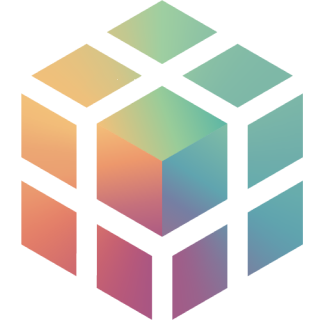

In [34]:
client = sy.login(port="8083", email="info@openmined.org", password="changethis")
client

In [35]:
dataset = sy.Dataset(
    name="Winsconsin Breast Cancer Data",
    description="Breast cancer wisconsin (diagnostic) dataset",
    citation = "O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and \
    prognosis via linear programming. Operations Research, 43(4), pages 570-577, \
    July-August 1995.",
    url="https://goo.gl/U2Uwz2"
)

In [37]:
# Create the assets to be attached to the Dataset
data_asset = sy.Asset(
    name="Breast Cancer Data", 
    data=private_data,
    mock=mock_data
)
dataset.add_asset(data_asset)

SyftSuccess: Asset 'Breast Cancer Data' added to 'Winsconsin Breast Cancer Data' Dataset.

In [39]:
dataset

syft.service.dataset.dataset.CreateDataset

In [40]:
client.upload_dataset(dataset)

INFO:     127.0.0.1:58312 - "POST /api/v2/api_call HTTP/1.1" 200 OK


Uploading:   0%|                                    | 0/1 [00:00<?, ?it/s]

INFO:     127.0.0.1:58314 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58316 - "POST /api/v2/api_call HTTP/1.1" 200 OK


Uploading: Breast Cancer Data: 100%|████████| 1/1 [00:00<00:00,  2.85it/s]

INFO:     127.0.0.1:58318 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58320 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftSuccess: Dataset uploaded to 'pet-test-domain'. To see the datasets uploaded by a client on this node, use command `[your_client].datasets`

In [41]:
client.datasets

INFO:     127.0.0.1:58322 - "POST /api/v2/api_call HTTP/1.1" 200 OK


In [42]:
from syft.service.user.user_roles import ServiceRole
from syft.service.user.user import UserCreate

In [43]:
ds_profile = UserCreate(
    email="rachel@datascience.inst",
    name="Rachel Science",
    role=ServiceRole.DATA_SCIENTIST,
    password="abc123",
    password_verify="abc123",
    institution="Data Science Institute",
    website="datascience.inst",
)

In [45]:
client.users.create(**ds_profile)

INFO:     127.0.0.1:58324 - "POST /api/v2/api_call HTTP/1.1" 200 OK


```python
class UserView:
  id: str = ab73bf6a256a4342b1f667787eb18ccf
  name: str = "Rachel Science"
  email: str = "rachel@datascience.inst"
  institution: str = "Data Science Institute"
  website: str = "datascience.inst"
  role: str = ServiceRole.DATA_SCIENTIST
  notifications_enabled: str = {: True, : False, : False, : False}

```

In [46]:
scientist_domain = domain_node.client

INFO:     127.0.0.1:58326 - "GET /api/v2/metadata HTTP/1.1" 200 OK
Logged into <pet-test-domain: High-side Domain> as GUEST


INFO:     127.0.0.1:58326 - "POST /api/v2/login HTTP/1.1" 200 OK
INFO:     127.0.0.1:58326 - "GET /api/v2/api?verify_key=63939991268f1b19f762931b956755a2fbd4a534bb0b1e92cd39347b82edf5d8&communication_protocol=dev HTTP/1.1" 200 OK
INFO:     127.0.0.1:58328 - "POST /api/v2/api_call HTTP/1.1" 200 OK
Logged into <pet-test-domain: High side Domain> as <rachel@datascience.inst>
INFO:     127.0.0.1:58330 - "POST /api/v2/api_call HTTP/1.1" 200 OK


<DomainClient: pet-test-domain>
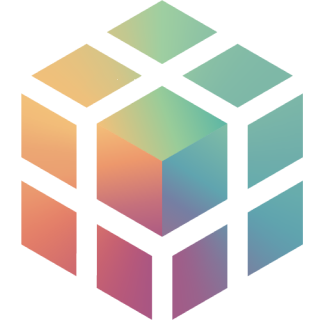

In [47]:
scientist_client = scientist_domain.login(email="rachel@datascience.inst", password="abc123")
scientist_client

In [48]:
scientist_client.datasets

INFO:     127.0.0.1:58332 - "POST /api/v2/api_call HTTP/1.1" 200 OK


In [49]:
scientist_client.datasets[0]

INFO:     127.0.0.1:58334 - "POST /api/v2/api_call HTTP/1.1" 200 OK


syft.service.dataset.dataset.Dataset

In [50]:
assets = scientist_client.datasets[0].assets

INFO:     127.0.0.1:58336 - "POST /api/v2/api_call HTTP/1.1" 200 OK


In [51]:
list(assets.keys())

['Breast Cancer Data']

In [52]:
asset = assets[0]
asset.mock

INFO:     127.0.0.1:58338 - "POST /api/v2/api_call HTTP/1.1" 200 OK


mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
0      32.117292     29.669649      214.769033  1655.889104          0.21476   
1      34.697292     37.059649      224.869033  1980.889104          0.18110   
2      33.817292     40.539649      221.969033  1857.889104          0.20596   
3      25.547292     39.669649      169.549033  1040.989104          0.23886   
4      34.417292     33.629649      227.069033  1951.889104          0.19666   
..           ...           ...             ...          ...              ...   
564    35.687292     41.679649      233.969033  2133.889104          0.20736   
565    34.257292     47.539649      223.169033  1915.889104          0.19416   
566    30.727292     47.369649      200.269033  1512.989104          0.18091   
567    34.727292     48.619649      232.069033  1919.889104          0.21416   
568    21.887292     43.829649      139.889033   835.889104          0.14899   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.381941        0.388899             0.196019       0.423062   
1            0.182981        0.175699             0.119089       0.362362   
2            0.264241        0.286199             0.176819       0.388062   
3            0.388241        0.330199             0.154119       0.440862   
4            0.237141        0.286799             0.153219       0.362062   
..                ...             ...                  ...            ...   
564          0.220241        0.332699             0.187819       0.353762   
565          0.207741        0.232799             0.146829       0.356362   
566          0.206641        0.181309             0.101939       0.340162   
567          0.381341        0.440199             0.200919       0.420862   
568          0.147961        0.088799             0.048919       0.339862   

     mean fractal dimension  ...  worst texture  worst perimeter   worst area  \
0                  0.141508  ...      43.007223       291.861213  2899.583128   
1                  0.119468  ...      49.087223       266.061213  2836.583128   
2                  0.122788  ...      51.207223       259.761213  2589.583128   
3                  0.160238  ...      52.177223       206.131213  1448.283128   
4                  0.121628  ...      42.347223       259.461213  2455.583128   
..                      ...  ...            ...              ...          ...   
564                0.119028  ...      52.077223       273.361213  2907.583128   
565                0.118128  ...      63.927223       262.261213  2611.583128   
566                0.119278  ...      59.797223       233.961213  2004.583128   
567                0.132958  ...      65.097223       291.861213  2701.583128   
568                0.121638  ...      56.047223       166.421213  1149.183128   

     worst smoothness  worst compactness  worst concavity  \
0            0.294569           0.919865         0.984088   
1            0.256169           0.440865         0.513788   
2            0.276769           0.678765         0.722588   
3            0.342169           1.120565         0.959088   
4            0.269769           0.459265         0.672188   
..                ...                ...              ...   
564          0.273369           0.465565         0.682888   
565          0.248969           0.446465         0.593688   
566          0.246269           0.563665         0.612488   
567          0.297369           1.122365         1.210888   
568          0.222329           0.318705         0.272188   

     worst concave points  worst symmetry  worst fractal dimension  y  
0                0.380006        0.750176                 0.202846  0  
1                0.300606        0.565076                 0.172966  0  
2                0.357606        0.651376                 0.171526  0  
3                0.372106        0.953876                 0.256946  0  
4                0.277106        0.526476            

In [53]:
asset.data

INFO:     127.0.0.1:58340 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftWarning: You do not have permission to access private data.

In [54]:
asset.mock.columns

INFO:     127.0.0.1:58342 - "POST /api/v2/api_call HTTP/1.1" 200 OK


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

In [55]:
asset.mock.head()

INFO:     127.0.0.1:58344 - "POST /api/v2/api_call HTTP/1.1" 200 OK


mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
0    32.117292     29.669649      214.769033  1655.889104          0.21476   
1    34.697292     37.059649      224.869033  1980.889104          0.18110   
2    33.817292     40.539649      221.969033  1857.889104          0.20596   
3    25.547292     39.669649      169.549033  1040.989104          0.23886   
4    34.417292     33.629649      227.069033  1951.889104          0.19666   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.381941        0.388899             0.196019       0.423062   
1          0.182981        0.175699             0.119089       0.362362   
2          0.264241        0.286199             0.176819       0.388062   
3          0.388241        0.330199             0.154119       0.440862   
4          0.237141        0.286799             0.153219       0.362062   

   mean fractal dimension  ...  worst texture  worst perimeter   worst area  \
0                0.141508  ...      43.007223       291.861213  2899.583128   
1                0.119468  ...      49.087223       266.061213  2836.583128   
2                0.122788  ...      51.207223       259.761213  2589.583128   
3                0.160238  ...      52.177223       206.131213  1448.283128   
4                0.121628  ...      42.347223       259.461213  2455.583128   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0          0.294569           0.919865         0.984088              0.380006   
1          0.256169           0.440865         0.513788              0.300606   
2          0.276769           0.678765         0.722588              0.357606   
3          0.342169           1.120565         0.959088              0.372106   
4          0.269769           0.459265         0.672188              0.277106   

   worst symmetry  worst fractal dimension  y  
0        0.750176                 0.202846  0  
1        0.565076                 0.172966  0  
2        0.651376                 0.171526  0  
3        0.953876                 0.256946  0  
4        0.526476                 0.160726  0  

[5 rows x 31 columns]

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
def run_logistic_regression_model(data):
    y = data["y"]
    X = data.drop(columns=["y"])

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model = LogisticRegression().fit(X_train,y_train)

    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    return acc_train, acc_test

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
result = run_logistic_regression_model(data=asset.mock)
result

INFO:     127.0.0.1:58346 - "POST /api/v2/api_call HTTP/1.1" 200 OK


(0.9460093896713615, 0.9300699300699301)

In [60]:
@sy.syft_function_single_use(data=asset)
def run_logistic_regression_model(data):
    # move imports to function body to make the function as a closure
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    y = data["y"]
    X = data.drop(columns=["y"])

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model = LogisticRegression().fit(X_train,y_train)

    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    return acc_train, acc_test

INFO:     127.0.0.1:58348 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58350 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftSuccess: Syft function 'run_logistic_regression_model' successfully created. To add a code request, please create a project using `project = syft.Project(...)`, then use command `project.create_code_request`.

In [61]:
run_logistic_regression_model.kwargs

{NodeIdentity <name=pet-test-domain, id=72500cdc, 🔑=381a4a94>: {'data': <UID: 7c57a91fc8994a28ab91f5a63762468b>}}

In [62]:
run_logistic_regression_model.input_policy_type

syft.service.policy.policy.ExactMatch

In [63]:
run_logistic_regression_model.output_policy_type
run_logistic_regression_model

```python
class SubmitUserCode:
  id: str = None
  func_name: str = "run_logistic_regression_model"
  code: str = "@sy.syft_function_single_use(data=asset)
def run_logistic_regression_model(data):
    # move imports to function body to make the function as a closure
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    y = data["y"]
    X = data.drop(columns=["y"])

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = LogisticRegression().fit(X_train,y_train)

    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    return acc_train, acc_test
"

```

In [64]:
scientist_client.create_project(
    name="Logistic Regression Study",
    description="Running a LogReg Model",
    user_email_address="rachel@datascience.inst"
)

INFO:     127.0.0.1:58353 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58355 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58357 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58361 - "GET /api/v2/metadata HTTP/1.1" 200 OK
INFO:     127.0.0.1:58361 - "GET /api/v2/api?verify_key=381a4a94a969b6aac3e280aec08c5415b6968dae360614dfc6129fd16a16e70e&communication_protocol=dev HTTP/1.1" 200 OK
INFO:     127.0.0.1:58363 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58359 - "POST /api/v2/api_call HTTP/1.1" 200 OK


syft.service.project.project.Project

In [65]:
scientist_client.projects

INFO:     127.0.0.1:58365 - "POST /api/v2/api_call HTTP/1.1" 200 OK


In [66]:
ml_project = scientist_client.get_project(name="Logistic Regression Study")
ml_project

INFO:     127.0.0.1:58369 - "POST /api/v2/api_call HTTP/1.1" 200 OK


syft.service.project.project.Project

In [67]:
ml_project.create_code_request(run_logistic_regression_model, scientist_client)

INFO:     127.0.0.1:58371 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58373 - "GET /api/v2/api?verify_key=63939991268f1b19f762931b956755a2fbd4a534bb0b1e92cd39347b82edf5d8&communication_protocol=dev HTTP/1.1" 200 OK
INFO:     127.0.0.1:58375 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftSuccess: Code request for 'run_logistic_regression_model' successfully added to 'Logistic Regression Study' Project. To see code requests by a client, run `[your_client].code`

In [68]:
scientist_client.code

INFO:     127.0.0.1:58377 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58379 - "POST /api/v2/api_call HTTP/1.1" 200 OK


In [69]:
scientist_client.code.run_logistic_regression_model(data=asset)

INFO:     127.0.0.1:58381 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftError: <class 'syft.service.code.user_code.UserCodeStatusCollection'> Your code is waiting for approval. Code status on node 'pet-test-domain' is 'UserCodeStatus.PENDING'.

In [70]:
do_client = sy.login(port="8083", email="info@openmined.org", password="changethis")
do_client.requests

INFO:     127.0.0.1:58383 - "GET /api/v2/metadata HTTP/1.1" 200 OK
INFO:     127.0.0.1:58383 - "POST /api/v2/login HTTP/1.1" 200 OK
INFO:     127.0.0.1:58383 - "GET /api/v2/api?verify_key=381a4a94a969b6aac3e280aec08c5415b6968dae360614dfc6129fd16a16e70e&communication_protocol=dev HTTP/1.1" 200 OK
INFO:     127.0.0.1:58385 - "POST /api/v2/api_call HTTP/1.1" 200 OK
Logged into <pet-test-domain: High side Domain> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

INFO:     127.0.0.1:58387 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58389 - "POST /api/v2/api_call HTTP/1.1" 200 OK


In [71]:
request = do_client.requests[0]
request

INFO:     127.0.0.1:58391 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58393 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58395 - "POST /api/v2/api_call HTTP/1.1" 200 OK


syft.service.request.request.Request

In [72]:
request.code

INFO:     127.0.0.1:58397 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58399 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58401 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58403 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58405 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58407 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58409 - "POST /api/v2/api_call HTTP/1.1" 200 OK


```python
@sy.syft_function_single_use(data=asset)
def run_logistic_regression_model(data):
    # move imports to function body to make the function as a closure
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    y = data["y"]
    X = data.drop(columns=["y"])

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = LogisticRegression().fit(X_train,y_train)

    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    return acc_train, acc_test
```

In [74]:
do_client.datasets.get_all()

INFO:     127.0.0.1:58413 - "POST /api/v2/api_call HTTP/1.1" 200 OK


DictTuple(syft.service.dataset.dataset.Dataset,)

In [75]:
do_client.datasets["Winsconsin Breast Cancer Data"].assets[0].mock

INFO:     127.0.0.1:58415 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58417 - "POST /api/v2/api_call HTTP/1.1" 200 OK


mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
0      32.117292     29.669649      214.769033  1655.889104          0.21476   
1      34.697292     37.059649      224.869033  1980.889104          0.18110   
2      33.817292     40.539649      221.969033  1857.889104          0.20596   
3      25.547292     39.669649      169.549033  1040.989104          0.23886   
4      34.417292     33.629649      227.069033  1951.889104          0.19666   
..           ...           ...             ...          ...              ...   
564    35.687292     41.679649      233.969033  2133.889104          0.20736   
565    34.257292     47.539649      223.169033  1915.889104          0.19416   
566    30.727292     47.369649      200.269033  1512.989104          0.18091   
567    34.727292     48.619649      232.069033  1919.889104          0.21416   
568    21.887292     43.829649      139.889033   835.889104          0.14899   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.381941        0.388899             0.196019       0.423062   
1            0.182981        0.175699             0.119089       0.362362   
2            0.264241        0.286199             0.176819       0.388062   
3            0.388241        0.330199             0.154119       0.440862   
4            0.237141        0.286799             0.153219       0.362062   
..                ...             ...                  ...            ...   
564          0.220241        0.332699             0.187819       0.353762   
565          0.207741        0.232799             0.146829       0.356362   
566          0.206641        0.181309             0.101939       0.340162   
567          0.381341        0.440199             0.200919       0.420862   
568          0.147961        0.088799             0.048919       0.339862   

     mean fractal dimension  ...  worst texture  worst perimeter   worst area  \
0                  0.141508  ...      43.007223       291.861213  2899.583128   
1                  0.119468  ...      49.087223       266.061213  2836.583128   
2                  0.122788  ...      51.207223       259.761213  2589.583128   
3                  0.160238  ...      52.177223       206.131213  1448.283128   
4                  0.121628  ...      42.347223       259.461213  2455.583128   
..                      ...  ...            ...              ...          ...   
564                0.119028  ...      52.077223       273.361213  2907.583128   
565                0.118128  ...      63.927223       262.261213  2611.583128   
566                0.119278  ...      59.797223       233.961213  2004.583128   
567                0.132958  ...      65.097223       291.861213  2701.583128   
568                0.121638  ...      56.047223       166.421213  1149.183128   

     worst smoothness  worst compactness  worst concavity  \
0            0.294569           0.919865         0.984088   
1            0.256169           0.440865         0.513788   
2            0.276769           0.678765         0.722588   
3            0.342169           1.120565         0.959088   
4            0.269769           0.459265         0.672188   
..                ...                ...              ...   
564          0.273369           0.465565         0.682888   
565          0.248969           0.446465         0.593688   
566          0.246269           0.563665         0.612488   
567          0.297369           1.122365         1.210888   
568          0.222329           0.318705         0.272188   

     worst concave points  worst symmetry  worst fractal dimension  y  
0                0.380006        0.750176                 0.202846  0  
1                0.300606        0.565076                 0.172966  0  
2                0.357606        0.651376                 0.171526  0  
3                0.372106        0.953876                 0.256946  0  
4                0.277106        0.526476            

In [77]:
do_asset = do_client.datasets["Winsconsin Breast Cancer Data"].assets[0]
do_asset

INFO:     127.0.0.1:58421 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58423 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58425 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58427 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58429 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58431 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58433 - "POST /api/v2/api_call HTTP/1.1" 200 OK


Asset(name='Breast Cancer Data', node_uid='72500cdc5c594890b91d92cc88833554', action_id='7c57a91fc8994a28ab91f5a63762468b')

In [84]:
callable_method = request.code.run

SyftWarning: This code was submitted by a User and could be UNSAFE.

In [85]:
mock_result = callable_method(data=do_asset.mock)
mock_result

INFO:     127.0.0.1:58454 - "POST /api/v2/api_call HTTP/1.1" 200 OK


(0.9436619718309859, 0.9370629370629371)

In [86]:
private_data_result = callable_method(data=do_asset.data)
private_data_result

INFO:     127.0.0.1:58456 - "POST /api/v2/api_call HTTP/1.1" 200 OK


(0.9553990610328639, 0.9440559440559441)

In [88]:
# request.deposit_result(private_data_result)
request.approve()

Approving request on change run_logistic_regression_model for domain pet-test-domain
INFO:     127.0.0.1:58460 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftSuccess: Request a10d9269052a4041b62a452f6a77c023 changes applied

In [89]:
scientist_client = scientist_domain.login(email="rachel@datascience.inst", password="abc123")

INFO:     127.0.0.1:58474 - "POST /api/v2/login HTTP/1.1" 200 OK
INFO:     127.0.0.1:58474 - "GET /api/v2/api?verify_key=63939991268f1b19f762931b956755a2fbd4a534bb0b1e92cd39347b82edf5d8&communication_protocol=dev HTTP/1.1" 200 OK
INFO:     127.0.0.1:58476 - "POST /api/v2/api_call HTTP/1.1" 200 OK
Logged into <pet-test-domain: High side Domain> as <rachel@datascience.inst>


In [90]:
scientist_client.code

INFO:     127.0.0.1:58478 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58480 - "POST /api/v2/api_call HTTP/1.1" 200 OK


In [91]:
ptr = scientist_client.code.run_logistic_regression_model(data=scientist_client.datasets[0].assets[0])
ptr.get()

INFO:     127.0.0.1:58482 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58484 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58486 - "POST /api/v2/api_call HTTP/1.1" 200 OK
INFO:     127.0.0.1:58488 - "POST /api/v2/api_call HTTP/1.1" 200 OK


/Users/madhavajay/dev/PySyft/.tox/syft.jupyter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhavajay/dev/PySyft/.tox/syft.jupyter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

(0.9460093896713615, 0.965034965034965)

In [ ]:
# We've got our results, without needing to access nor see the true and private data asset!!! 🎉🥳🎉 